DATA PROCESSING

In [1503]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read data and relabel column refdate to Date
data = pd.read_csv("Risk Analyst Case study_092025.csv").rename(columns={"refdate":"Date"})
df_data = pd.DataFrame(data)

# List column labels
print(df_data.columns)
# Ascertain dataframe data type
print(df_data.dtypes)


Index(['Date', 'Asset Name', 'Mkt Value', 'Weight (%)', 'Active Weight (%)',
       'Total Risk', 'Marginal Contribution to Active Total Risk',
       'Marginal Contribution to Total Risk',
       '%Contribution to Active Total Risk', '%Contribution to Total Risk',
       'Beta (Bmk)', 'GICS_sector', 'PRICE', 'Contribution to Beta (Bmk)',
       'Market Capitalization', 'Country Of Exposure',
       'Overall ESG Rating Trend', 'Overall ESG Score',
       'Overall ESG Environmental Score', 'Overall ESG Social Score',
       'Overall ESG Governance Score'],
      dtype='object')
Date                                           object
Asset Name                                     object
Mkt Value                                     float64
Weight (%)                                     object
Active Weight (%)                              object
Total Risk                                    float64
Marginal Contribution to Active Total Risk    float64
Marginal Contribution to Total Risk   

ASSSIGN REQUIRED DATA TYPES

In [1504]:
# Convert Date to a format
df_data ['Date'] =  pd.to_datetime(df_data['Date'])


df_data['Weight (%)'] = df_data['Weight (%)'].str.replace('%', '')
df_data ['Weight (%)'] =  df_data ['Weight (%)'].astype(float)

df_data['Active Weight (%)'] = df_data['Active Weight (%)'].str.replace('%', '')
df_data ['Active Weight (%)'] =  df_data ['Active Weight (%)'].astype(float)

df_data['%Contribution to Active Total Risk'] = df_data['%Contribution to Active Total Risk'].str.replace('%', '')
df_data ['%Contribution to Active Total Risk'] =  df_data ['%Contribution to Active Total Risk'].astype(float)

df_data['%Contribution to Total Risk'] = df_data['%Contribution to Total Risk'].str.replace('%', '')
df_data ['%Contribution to Total Risk'] =  df_data ['%Contribution to Total Risk'].astype(float)

# Assign unclassified in GICS Sector to Other
df_data['GICS_sector'] = df_data['GICS_sector'].fillna("Other")

print(df_data.dtypes)



Date                                          datetime64[ns]
Asset Name                                            object
Mkt Value                                            float64
Weight (%)                                           float64
Active Weight (%)                                    float64
Total Risk                                           float64
Marginal Contribution to Active Total Risk           float64
Marginal Contribution to Total Risk                  float64
%Contribution to Active Total Risk                   float64
%Contribution to Total Risk                          float64
Beta (Bmk)                                           float64
GICS_sector                                           object
PRICE                                                float64
Contribution to Beta (Bmk)                           float64
Market Capitalization                                float64
Country Of Exposure                                   object
Overall ESG Rating Trend

/tmp/ipykernel_60714/999503048.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



COMPUTATIONS

In [1505]:
# Calculate Tracking Error (TE) contributions from active weight (%) and Marginal Contribution to Active Total Risk
df_data['Share TE Contribution'] = df_data['Active Weight (%)'] / 100  * df_data ['Marginal Contribution to Active Total Risk']
TE = df_data.groupby('Date')['Share TE Contribution'].sum() * 100


# Calculate Portfolio Beta
df_data['Share Beta Contribution'] = df_data['Weight (%)'] / 100  * df_data ['Beta (Bmk)']
Beta = df_data.groupby('Date')['Share Beta Contribution'].sum()

# Share Contributions to TE
latest_share_contributions = df_data.loc[df_data['Date']=='30/03/2023',['Asset Name', '%Contribution to Active Total Risk']]
latest_share_contributions = latest_share_contributions.sort_values(by= '%Contribution to Active Total Risk',ascending =False)
cumulative_share_contributions = np.cumsum(latest_share_contributions['%Contribution to Active Total Risk'])

# Sector Contributions to TE
df_data['Share TE Contribution'] = df_data['Active Weight (%)'] / 100  * df_data ['Marginal Contribution to Active Total Risk']
TE_Sector = df_data.groupby(['Date','GICS_sector'])['%Contribution to Active Total Risk'].sum()
TE_Sector = TE_Sector.reset_index()


print(TE_Sector.keys())
print(TE_Sector.values)
print(TE_Sector)


Index(['Date', 'GICS_sector', '%Contribution to Active Total Risk'], dtype='object')
[[Timestamp('2022-09-29 00:00:00') 'Communication Services'
  12.089999999999998]
 [Timestamp('2022-09-29 00:00:00') 'Consumer Discretionary' 34.21]
 [Timestamp('2022-09-29 00:00:00') 'Consumer Staples' 13.41]
 ...
 [Timestamp('2023-03-30 00:00:00') 'Other' 0.11]
 [Timestamp('2023-03-30 00:00:00') 'Real Estate' -2.83]
 [Timestamp('2023-03-30 00:00:00') 'Utilities' -2.5300000000000002]]
           Date             GICS_sector  %Contribution to Active Total Risk
0    2022-09-29  Communication Services                               12.09
1    2022-09-29  Consumer Discretionary                               34.21
2    2022-09-29        Consumer Staples                               13.41
3    2022-09-29                  Energy                               -1.83
4    2022-09-29              Financials                               28.93
...         ...                     ...                               

VISUALIZATION

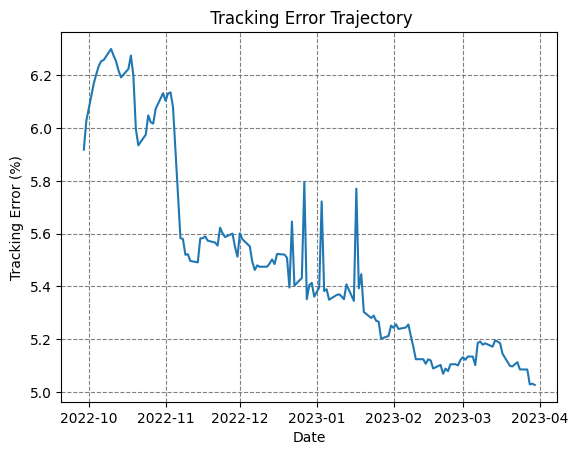

In [1506]:
# Tracking Error Through Time
plt.grid(True)
plt.grid(linestyle = '--', color = 'gray')
plt.title (' Tracking Error Trajectory')
plt.ylabel ("Tracking Error (%)")
plt.xlabel("Date")
plt.plot(TE)




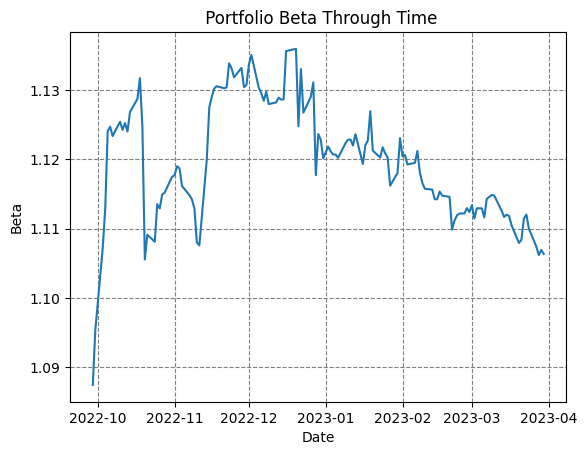

In [1507]:
# Beta Through Time
plt.grid(True)
plt.grid(linestyle = '--', color = 'gray')
plt.title (' Portfolio Beta Through Time')
plt.ylabel ('Beta')
plt.xlabel('Date')
plt.plot(Beta)

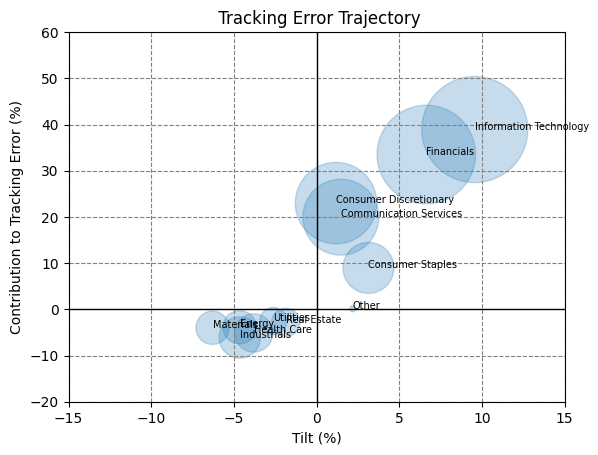

In [1508]:
# latest GICS Sector Contributions


x_value = df_data.loc[df_data['Date']=='30/03/2023',['GICS_sector', 'Active Weight (%)']]
x = x_value.groupby('GICS_sector')['Active Weight (%)'].sum()
y_value = df_data.loc[df_data['Date']=='30/03/2023',['GICS_sector', '%Contribution to Active Total Risk']]
y = y_value.groupby('GICS_sector')['%Contribution to Active Total Risk'].sum()
label = y
bubble_value = df_data.loc[df_data['Date']=='30/03/2023',['GICS_sector', 'Share TE Contribution']]
bubble = abs(bubble_value.groupby('GICS_sector')['Share TE Contribution'].sum()) * 300000

plt.grid(True)
plt.grid(linestyle = '--', color = 'gray')
plt.title (' Tracking Error Trajectory')
plt.ylabel ("Contribution to Tracking Error (%)")
plt.xlabel("Tilt (%)")
plt.xlim(-15, 15)
plt.ylim(-20,60)


plt.scatter(x,y,bubble, alpha = 0.25)

labels = y.keys()

# Label positive contributions
for iter in range(12):
    plt.text( x.iloc[iter], y.iloc[iter],labels[iter],fontsize=7,)

# Add a solid horizontal and vertical lines
plt.axhline(y=0, color='black', linestyle='-', linewidth=1) 
plt.axvline(x=0, color='black', linestyle='-', linewidth=1) 

plt.show()


0       12.09
1       34.21
2       13.41
3       -1.83
4       28.93
        ...  
1627    38.91
1628    -4.00
1629     0.11
1630    -2.83
1631    -2.53
Name: %Contribution to Active Total Risk, Length: 1632, dtype: float64


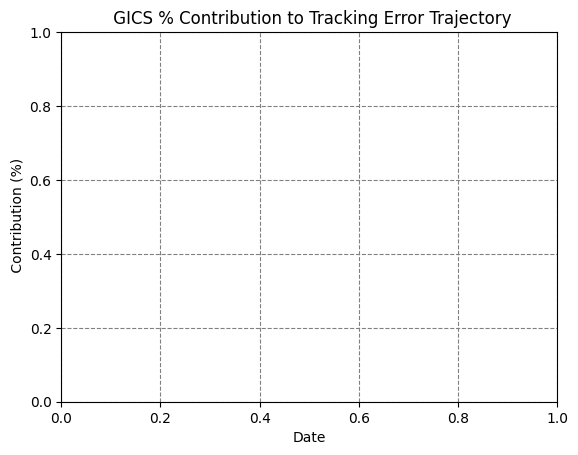

In [1509]:
# GICS Sectors Tracking Error Contributions Through Time
plt.grid(True)
plt.grid(linestyle = '--', color = 'gray')
plt.title (' GICS % Contribution to Tracking Error Trajectory')
plt.ylabel (" Contribution (%)")
plt.xlabel("Date")
#plt.plot(TE_Sector['Date'],TE_Sector.groupby['%Contribution to Active Total Risk'])
print(TE_Sector['%Contribution to Active Total Risk'])

1402


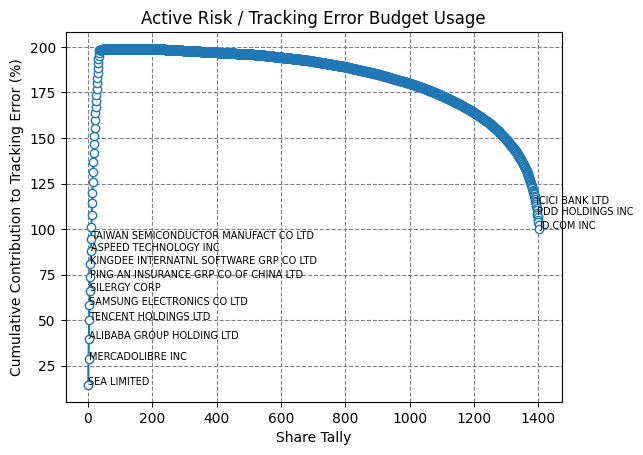

In [1510]:
num_shares = cumulative_share_contributions.size
h_value = np.arange(1,cumulative_share_contributions.size + 1)
h_value = pd.Series(h_value)
v_value = cumulative_share_contributions

line_labels = latest_share_contributions['Asset Name']

plt.grid(True)
plt.grid(linestyle = '--', color = 'gray')
plt.title ("Active Risk / Tracking Error Budget Usage")
plt.ylabel ("Cumulative Contribution to Tracking Error (%)")
plt.xlabel("Share Tally")

plt.plot(h_value, v_value, marker='o', markerfacecolor='white')

# Label positive contributions
for iter in range(10):
    plt.text( h_value.iloc[iter], v_value.iloc[iter],line_labels.iloc[iter],fontsize=7,)

# Label negative contribution -- Few shares done
num_points = cumulative_share_contributions.size - 1
for iter in range(0,15,5):
    plt.text( h_value.iloc[num_points - iter], v_value.iloc[num_points - iter],line_labels.iloc[num_points - iter],fontsize=7,)

print(h_value.size)